# IS 508 PROJECT & ORGANIZATION CHANGE MANAGEMENT

# Isaac Etungu

<b>M21/MIT/742U</b>

In this test, I'll will design a model to predict the number of deaths due to covid-19 
Pandemic in America. 

My focus will be predicting daily deaths using simple & multiple linear regressions with respect to R-Squared & RMSE performance evaluation metrices

Data set from URL: https://covid19.who.int/table <b>As at: July 10th 2021 at 6.11.42 PM.csv<b/>

<b>Importing libraries</b>

In [1]:
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

<b>Loading the data set</b>

In [31]:
file=pd.read_csv("WHO COVID-19 global table data July 10th 2021 at 6.11.42 PM.csv",sep=",")#This has global regions
new_df = file.loc[(file['WHO Region'] == 'Americas')]#Reads only for America region
new_df.head()#preview first five rows

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours,Transmission Classification
1,United States of America,Americas,33451965,10106.25,108004,32.63,22569,601231,181.64,1551,0.47,301,Community transmission
3,Brazil,Americas,18909037,8895.88,351896,165.55,54022,528540,248.66,10474,4.93,1648,Community transmission
8,Argentina,Americas,4593763,10164.14,123389,273.01,19423,97439,215.59,3135,6.94,456,Community transmission
9,Colombia,Americas,4426811,8700.00,185829,365.21,24229,110578,217.32,4034,7.93,559,Community transmission
15,Mexico,Americas,2558369,1984.27,39100,30.33,8507,234192,181.64,1145,0.89,234,Community transmission


<b>Renaming columns</b>

In [34]:
#to make them easy to undertand' 
new_df.rename(columns = {'Name':'Country','Cases - cumulative total':'Cases(Cum.Total)', 
                         'Cases - cumulative total per 100000 population':'Cases(Cum.Total)per 100000 population', 
                         'Cases - newly reported in last 7 days':'Cases(last 7 days)', 
                         'Cases - newly reported in last 7 days per 100000 population':'Cases(last 7 days)per 100000 population', 
                         'Cases - newly reported in last 24 hours':'Cases(last 24 hours)', 
                         'Deaths - cumulative total':'Deaths(Cum.Total)','Deaths - cumulative total per 100000 population':
                         'Deaths(Cum.Total) per 100000 population', 'Deaths reported in last 7 days':
                         'Deaths(last 7 days)','Deaths - newly reported in last 7 days per 100000 population':
                         'Deaths(last 7 days)per 100000 population','Deaths - newly reported in last 24 hours':
                         'Deaths(last 24 hours)'}, inplace = True)


/srv/conda/envs/notebook/lib/python3.6/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
#preview first five rows of cleaned data
new_df.head()

,Country,WHO Region,Cases(Cum.Total),Cases(Cum.Total)per 100000 population,Cases(last 7 days),Cases(last 7 days)per 100000 population,Cases(last 24 hours),Deaths(Cum.Total),Deaths(Cum.Total) per 100000 population,Deaths - newly reported in last 7 days,Deaths(last 7 days)per 100000 population,Deaths(last 24 hours),Transmission Classification
1,United States of America,Americas,33451965,10106.25,108004,32.63,22569,601231,181.64,1551,0.47,301,Community transmission
3,Brazil,Americas,18909037,8895.88,351896,165.55,54022,528540,248.66,10474,4.93,1648,Community transmission
8,Argentina,Americas,4593763,10164.14,123389,273.01,19423,97439,215.59,3135,6.94,456,Community transmission
9,Colombia,Americas,4426811,8700.00,185829,365.21,24229,110578,217.32,4034,7.93,559,Community transmission
15,Mexico,Americas,2558369,1984.27,39100,30.33,8507,234192,181.64,1145,0.89,234,Community transmission


In [36]:
#preview last five rows of cleaned data
new_df.tail()

,Country,WHO Region,Cases(Cum.Total),Cases(Cum.Total)per 100000 population,Cases(last 7 days),Cases(last 7 days)per 100000 population,Cases(last 24 hours),Deaths(Cum.Total),Deaths(Cum.Total) per 100000 population,Deaths - newly reported in last 7 days,Deaths(last 7 days)per 100000 population,Deaths(last 24 hours),Transmission Classification
213,Falkland Islands (Malvinas),Americas,60,1722.65,0,0.0,0,0,0.0,0,0.0,0,No cases
216,Saint Pierre and Miquelon,Americas,26,448.66,0,0.0,0,0,0.0,0,0.0,0,Sporadic cases
217,Montserrat,Americas,20,400.08,0,0.0,0,1,20.0,0,0.0,0,No cases
218,Sint Eustatius,Americas,20,637.15,0,0.0,0,0,0.0,0,0.0,0,No cases
220,Saba,Americas,7,362.13,0,0.0,0,0,0.0,0,0.0,0,No cases


#    1. Descriptive statistics

<b>More information on the data set</b>

In [37]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 1 to 220
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country                                   56 non-null     object 
 1   WHO Region                                56 non-null     object 
 2   Cases(Cum.Total)                          56 non-null     int64  
 3   Cases(Cum.Total)per 100000 population     56 non-null     float64
 4   Cases(last 7 days)                        56 non-null     int64  
 5   Cases(last 7 days)per 100000 population   56 non-null     float64
 6   Cases(last 24 hours)                      56 non-null     int64  
 7   Deaths(Cum.Total)                         56 non-null     int64  
 8   Deaths(Cum.Total) per 100000 population   56 non-null     float64
 9   Deaths - newly reported in last 7 days    56 non-null     int64  
 10  Deaths(last 7 days)per 100000 populatio

Dataset has 56 rows & 13 columns, No columns has missing values, variables containing mainly figure values with three of 13 columns containing object/string values

<b>American countries<b>

In [38]:
new_df['WHO Region'].value_counts().to_frame()

,WHO Region
Americas,56


56 countries in America region

<b>Describing the dataset</b>

In [39]:
new_df.describe()

,Cases(Cum.Total),Cases(Cum.Total)per 100000 population,Cases(last 7 days),Cases(last 7 days)per 100000 population,Cases(last 24 hours),Deaths(Cum.Total),Deaths(Cum.Total) per 100000 population,Deaths - newly reported in last 7 days,Deaths(last 7 days)per 100000 population,Deaths(last 24 hours)
count,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,1.311608e+06,4099.591964,17272.714286,90.348393,2733.410714,34481.214286,77.229286,451.392857,1.582500,70.035714
std,5.112890e+06,3312.030801,55956.745585,202.678019,8633.177160,112121.113116,95.639841,1547.820305,2.377306,240.557305
min,7.000000e+00,102.940000,0.000000,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.086500e+03,1395.055000,10.750000,9.005000,0.000000,17.750000,11.247500,0.000000,0.000000,0.000000
50%,1.556400e+04,3181.080000,310.000000,33.020000,25.000000,261.000000,53.310000,3.500000,0.445000,0.000000
75%,3.425358e+05,6268.192500,7568.250000,92.862500,955.500000,5968.250000,93.797500,122.250000,1.912500,18.500000
max,3.345196e+07,10785.670000,351896.000000,1465.090000,54022.000000,601231.000000,587.600000,10474.000000,10.520000,1648.000000


<b>Transmission classification</b> 

In [40]:
new_df['Transmission Classification'].value_counts().to_frame()

,Transmission Classification
Community transmission,42
Sporadic cases,5
Clusters of cases,5
No cases,4


There are 42 community transmissions out of the total of 56 records.

<b>Deaths in last 24 hours</b>

In [41]:
death_24hrs=new_df[['Country','Deaths(last 24 hours)']]
highdeath_24hrs = death_24hrs.sort_values(by=['Deaths(last 24 hours)'], ascending= False)
highdeath_24hrs.head()

,Country,Deaths(last 24 hours)
3,Brazil,1648
9,Colombia,559
8,Argentina,456
1,United States of America,301
15,Mexico,234


   Brazil reported 1,648 deaths, with Puerto Rico reporting just 1 in last 24hours as of WHO data report of July 10th 2021 at 6.11.42 PM

#    2. Simple Linear regression

   Takes the form; $$y=mx+c$$ $$y=dependent-variable, m=slope, x=independent-variable, c=y-intercept$$


<b>Import model library</b>

In [42]:
from sklearn.linear_model import LinearRegression 

 <b>Fitting the model</b>

In [43]:
x = new_df[['Cases(last 24 hours)']]
y = new_df['Deaths(last 24 hours)'] 
lm = LinearRegression() 
lm.fit(x,y)
lm

LinearRegression()

<b>Finding intercept</b>

In [44]:
lm.intercept_

-4.010264462076975

<b>Finding slope/coefficient</b>

In [45]:
lm.coef_

array([0.02708923])

# Model formular; 
$$Deaths(last 24 hours)= 0.02708923 * Cases(last 24 hours) - 4.010264462076975$$

<b>As of July 10th 2021 at 6.11.42 PM PM</b> data by WHO. This model keeps changing as data is being updated daily

<b>Correlation</b>

In [55]:
# cases in last 24hours vs death last 24hours
new_df[['Cases(last 24 hours)','Deaths(last 24 hours)']].corr()

,Cases(last 24 hours),Deaths(last 24 hours)
Cases(last 24 hours),1.000000,0.972184
Deaths(last 24 hours),0.972184,1.000000


Strong positve relationship <b>(0.972184)</b> between deaths reported in last 24 hours and cases reported in last 24 hours

<b>simple linear regression graph</b>

(0.0, 1731.0354742631794)

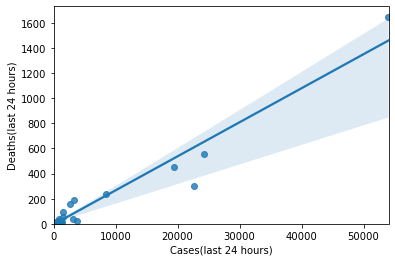

In [16]:
sns.regplot(x="Cases(last 24 hours)", y="Deaths(last 24 hours)", data=new_df)
plt.ylim(0,)

As Cases reported in the last 24 hours increase, even death in the same period increase.

<b>Box plot</b>

<AxesSubplot:xlabel='Transmission Classification', ylabel='Deaths(last 24 hours)'>

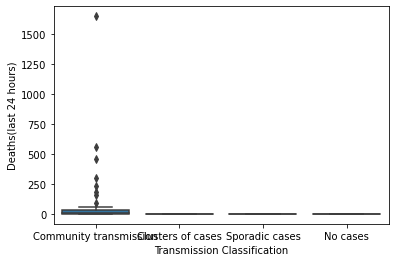

In [47]:
#Deaths in last 24hours vs Transmission classification.
sns.boxplot(x="Transmission Classification", y="Deaths(last 24 hours)", data=new_df)

Distribution of Deaths(cumu.Total) between cluster transmission and Community transmission, 
are distinct enough to take Transmission classification as a potential good predictor of Deaths reported in the last 24 hours).

# Evaluating the model

  <b>1. R-squared</b>

In [48]:
print('The R-squared is: ', lm.score(x, y))

The R-squared is:  0.9451426883656249


  <b>2. Mean Squared Error</b>

In [49]:
from sklearn.metrics import mean_squared_error #for calculating MSE
from math import sqrt #for calculating RSME

In [50]:
y=lm.predict(x)
mse = mean_squared_error(new_df['Deaths(last 24 hours)'], y)
print('Mean Squared Error:', mse)

Mean Squared Error: 3117.7858489231335


 <b>3. Root Mean Squared Error</b>

In [51]:
#since; mse=sqrt(mean_squared_error(new_df['Deaths(last 24 hours'], y))
print('Root Mean Squared Error:',sqrt(mse))

Root Mean Squared Error: 55.8371368259793


#    3. Multiple Linear Regression

Predicting <b>Deaths(last 24 hours)</b> in America by looking at three variables; 

    1. Cases reported in the last 24 hours; Cases(last 24 hours)
    2. Cases reported in the last 7 days; Cases(last 7 days) 
    3. Total cumulative Cases reported; Cases(Cum.Total)

Takes the form; $$𝑦=𝑏1𝑥1+𝑏2𝑥2+b3x3+𝑐$$ $$y=dependent-variable, b1,b2,b3=slope, x1,x2,x3=independent-variables, c=y-intercept$$

<b>Training & Fitting the model</b>

In [52]:
z = new_df[['Cases(last 24 hours)','Cases(last 7 days)','Cases(Cum.Total)']]
lm.fit(z, new_df['Deaths(last 24 hours)'])

LinearRegression()

<b>Finding intercept</b>

In [53]:
lm.intercept_

-3.152937889926207

<b>Finding slope/coefficient</b>

In [54]:
#coefficient values for b1,b2,b3
lm.coef_

array([ 4.70509139e-02, -2.10651332e-03, -1.45131908e-05])

# Model formular; 
$$Deaths(last 24 hours)= 4.70509139 * Cases(last 24 hours) - 2.10651332 * Cases(last 7 days) - 1.45131908 * Cases(Cum.Total) - 3.152937889926207 $$ 

<b>As of As at: July 10th 2021 at 6.11.42 PM</b> data by WHO. This model keeps changing as data is being updated daily

In [56]:
#correlation
new_df[['Cases(last 24 hours)','Cases(last 7 days)','Cases(Cum.Total)']].corr()

,Cases(last 24 hours),Cases(last 7 days),Cases(Cum.Total)
Cases(last 24 hours),1.000000,0.992458,0.745889
Cases(last 7 days),0.992458,1.000000,0.673512
Cases(Cum.Total),0.745889,0.673512,1.000000


Cases reported in the last 24 hours and cases reported in the last 7 days are potential good predictors of deaths in the next 24 hours as indicated by the strong positive relationship <b>(0.992458)</b> between them. 

Cases reported in last 24 hours are equally related to the cummulative cases reported <b>(0.745889)</b> as far predicting death in the next 24 hours is concerned, but not as stronger as it in the first scenario.

# Evaluating the model

  <b>1. R-squared</b>

In [57]:
print('The R-squared is:',lm.score(z, new_df['Deaths(last 24 hours)']))

The R-squared is: 0.9707863962523477


  <b>2. Mean Squared Error</b>

In [58]:
#Calculating the Mean Squared Error; MSE
#prediction based on our model
y_predict_multifit = lm.predict(z)
#Now we can compare the predicted results with the actual results and print
mse=mean_squared_error(new_df['Deaths(last 24 hours)'], y_predict_multifit)
print('Mean Squared Error:',mse)


Mean Squared Error: 1660.3394815906993


 <b>3. Root Mean Squared Error</b>

In [59]:
#since mse=mean_squared_error(new_df['Deaths(last 24 hours)'], y_predict_multifit), we call mse
print('Root Mean Squared Error:',sqrt(mse))

Root Mean Squared Error: 40.74726348591644


# Summary in table format

<b>Import table reading libraries</b>

In [60]:
!pip install tabulate
from tabulate import tabulate

<b>Summarising modules in a table</b>

In [61]:
table = [['Model vs Performance.metric','R-Squared', 'MSE', 'RMSE'], ['Simple Linear Regression', 
                                                                      0.9451426883656249, 3117.7858489231335,55.8371368259793],
         ['Multiple Linear regression', 0.9707863962523477, 1660.3394815906993,40.74726348591644]]
print(tabulate(table, headers='firstrow'))

Model vs Performance.metric      R-Squared      MSE     RMSE
-----------------------------  -----------  -------  -------
Simple Linear Regression          0.945143  3117.79  55.8371
Multiple Linear regression        0.970786  1660.34  40.7473


<b>Decision making;</b>

A model with a a high R-squared and low RMSE is the best.

From the table above, comparing the two models; <b>Multiple Linear Regression Model is the best </b>because it has an accuracy (R-Squared) percenatge of approximately <b>97.07%</b>
with a low RSME of approximately <b>40.7473<b/>

<b>Therefore,</b>
The model for predicting Covid_19 daily deaths in America is;

$$Deaths(last 24 hours)= 4.70509139 * Cases(last 24 hours) - 2.10651332 * Cases(last 7 days) - 1.45131908 * Cases(Cum.Total) - 3.152937889926207 $$ 

<b>As of July 9th 2021 at 4.01.45 PM</b> data by WHO. This model keeps changing as data is being updated daily

# End
Author;
Isaac Etungu